## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from functools import reduce
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

mouse_study_df = pd.DataFrame.merge(mouse_metadata,study_results,how = 'right',on = 'Mouse ID',)
mouse_study_df.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1


In [2]:
#make columns workable
mouse_study_df.columns = mouse_study_df.columns.str.strip().str.replace('(', '').str.replace(')', '')
mouse_study_df.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight g,Timepoint,Tumor Volume mm3,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1


## Summary statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

tumor_avg=mouse_study_df.groupby('Drug Regimen').mean()
mean=tumor_avg['Tumor Volume mm3']
mean_df=pd.DataFrame(mean)
mean_df.rename(columns={'Tumor Volume mm3':'Tumor Volume Mean'},inplace=True)
mean_df.head(1)

,Tumor Volume Mean
Drug Regimen,
Capomulin,40.675741


In [15]:
tumor_median=mouse_study_df.groupby('Drug Regimen').median()
median=tumor_median['Tumor Volume mm3']
median_df=pd.DataFrame(median)
median_df.rename(columns={'Tumor Volume mm3':'Tumor Volume Median'},inplace=True)
median_df.head(1)

,Tumor Volume Median
Drug Regimen,
Capomulin,41.557809


In [19]:
tumor_std=mouse_study_df.groupby('Drug Regimen').std()
std=tumor_std["Tumor Volume mm3"]
std_df=pd.DataFrame(std)
std_df.rename(columns={'Tumor Volume mm3':'Tumor Volume STD'},inplace=True)
std_df.head(1)

,Tumor Volume STD
Drug Regimen,
Capomulin,4.994774


In [20]:
tumor_var=mouse_study_df.groupby('Drug Regimen').var()
var=tumor_var["Tumor Volume mm3"]
var_df=pd.DataFrame(var)
var_df.rename(columns={'Tumor Volume mm3':'Tumor Volume Variance'},inplace=True)
var_df.head(1)

,Tumor Volume Variance
Drug Regimen,
Capomulin,24.947764


In [21]:
tumor_sem=mouse_study_df.groupby('Drug Regimen').sem()
sem=tumor_sem['Tumor Volume mm3']
sem_df=pd.DataFrame(sem)
sem_df.rename(columns={'Tumor Volume mm3':'Tumor Volume SEM'},inplace=True)
sem_df.head(1)

,Tumor Volume SEM
Drug Regimen,
Capomulin,0.329346


In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
data_frames=[mean_df,median_df,std_df,var_df,sem_df]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Drug Regimen'],
                                            how='outer'), data_frames)
df_merged

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume STD,Tumor Volume Variance,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.322552,50.854632,6.507770,42.351070,0.512884
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar plots

In [104]:
data_points=mouse_study_df.groupby(["Drug Regimen"])["Drug Regimen"].count().reset_index(name="Data Count")
data_points=data_points.set_index("Drug Regimen")
data_points

,Data Count
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


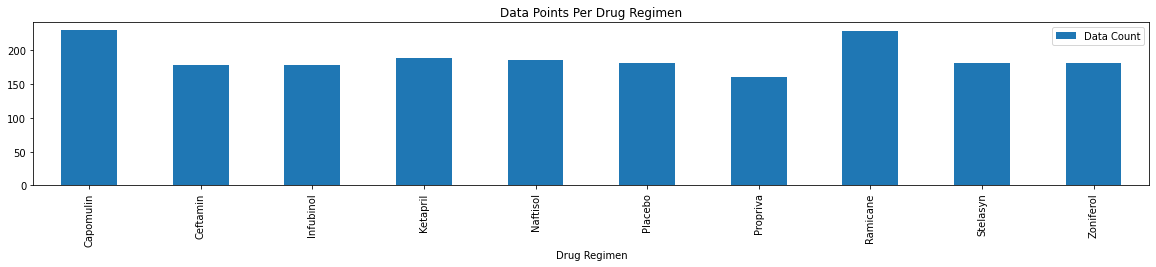

<Figure size 432x288 with 0 Axes>

In [89]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_points.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Data Points Per Drug Regimen")

plt.show()
plt.tight_layout()

Text(0, 0.5, 'Data Count')

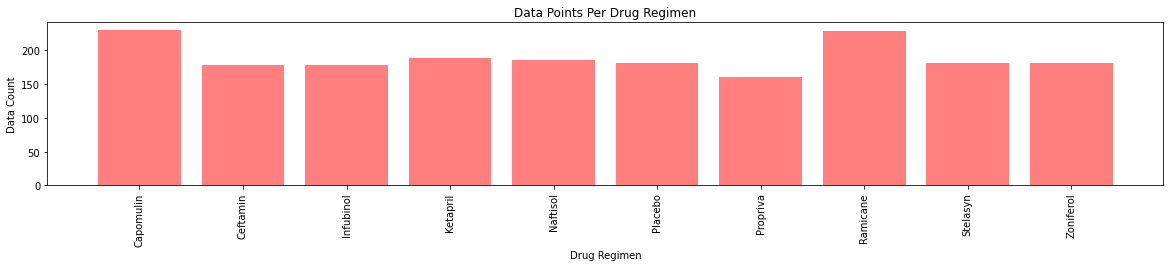

In [118]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.figure(figsize=(20,3))

x_axis = np.arange(len(data_points))

plt.bar(x_axis,data_points["Data Count"], color='r', alpha=0.5, align="center")

plt.xticks(tick_locations, rotation='vertical')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane',\
                           'Stelasyn','Zoniferol'])

plt.title("Data Points Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Count")

In [111]:
data_points

,Data Count
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


In [ ]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(x_axis, users, color='r', alpha=0.5, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, [""])

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Sets the y limits of the current chart
plt.ylim(0, max(users)+5000)

# Give our chart some labels and a tile
plt.title("Popularity of Programming Languages")
plt.xlabel("Programming Language")
plt.ylabel("Number of People Using Programming Languages")

## Pie plots

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen